In [15]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [16]:
#loading the dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Some Numerical Information about the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

## Data Cleaning

In [17]:
# Fill NaN values with 'Healthy Sleep'
df['Sleep Disorder'].fillna('Healthy Sleep', inplace=True)
df['Sleep Disorder'].value_counts()

Sleep Disorder
Healthy Sleep    219
Sleep Apnea       78
Insomnia          77
Name: count, dtype: int64

In [18]:
# Create Age Group
df['Age'] = pd.cut(df['Age'], bins=[26, 30 ,35, 40, 45, 50, 55, 60], labels=['26-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60'])
df['Age'].value_counts()

Age
40-45    99
35-40    71
30-35    62
50-55    43
45-50    34
55-60    33
26-30    32
Name: count, dtype: int64

In [19]:
company_dic = df['Occupation'].value_counts().head(6)
def occup(x, dic):
    if x in dic.keys():
        return x 
    else :
        return 'Others'

df['Occupation'] = df['Occupation'].apply(lambda x : occup(x, company_dic))
df['Occupation'].value_counts()

Occupation
Nurse         73
Doctor        71
Engineer      63
Lawyer        47
Others        43
Teacher       40
Accountant    37
Name: count, dtype: int64

In [20]:
# Reduce unique values of BMI Category
df['BMI Category'] = df['BMI Category'].apply(lambda x : 'Normal' if x == 'Normal Weight' else x)
df = df[df['BMI Category'] != 'Obese']
df['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Name: count, dtype: int64

In [21]:
#spliting the blood pressure into two columns
df['Systolic BP'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['Diastolic BP'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])
#droping the blood pressure column
df.drop('Blood Pressure', axis=1, inplace=True)

## Data Visualization

In [22]:
# Define list of Continuous columns Names
continuous = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic BP', 'Diastolic BP']

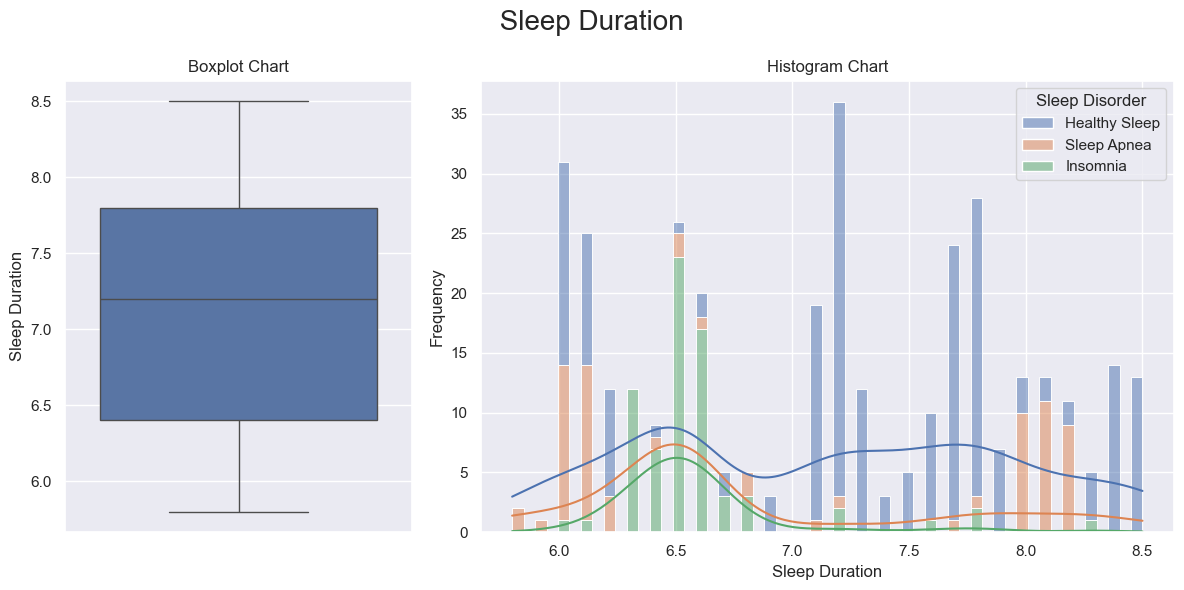

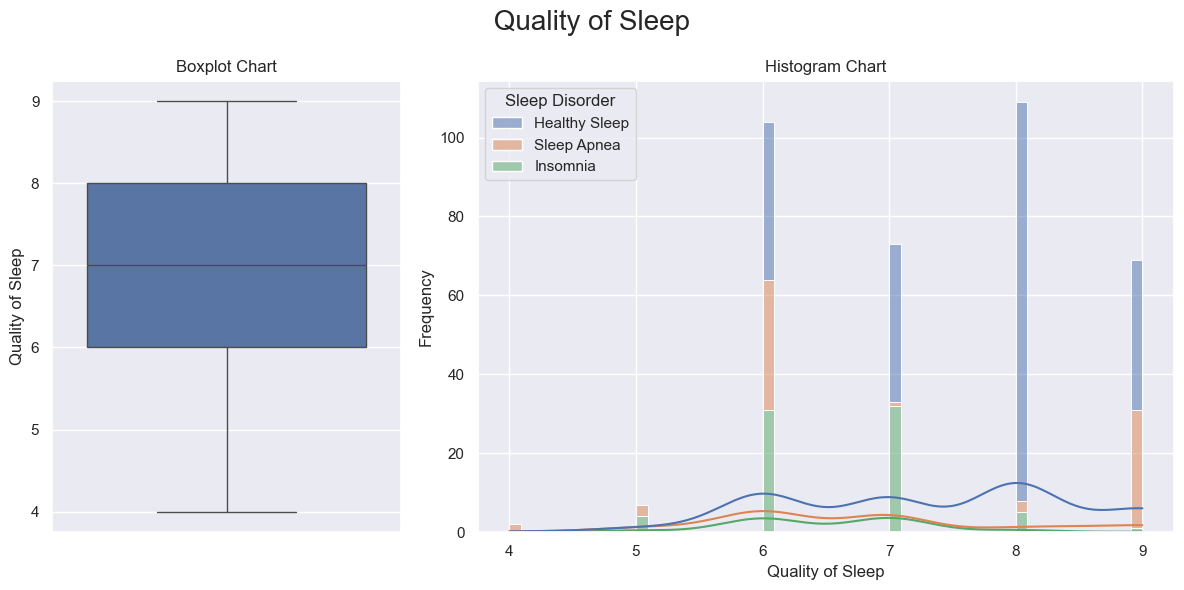

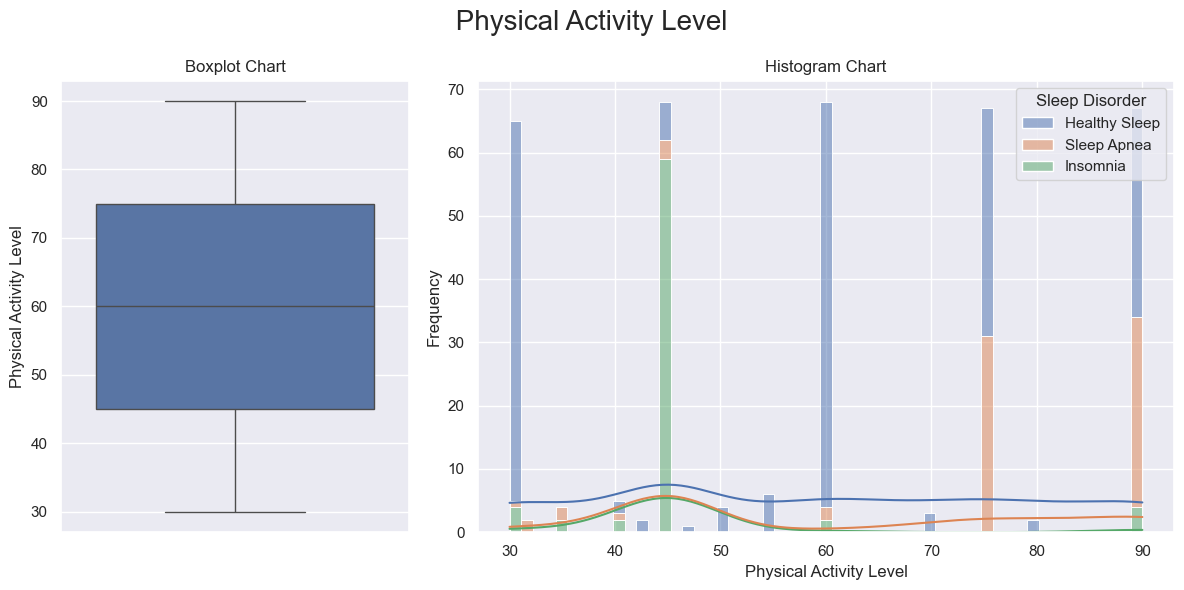

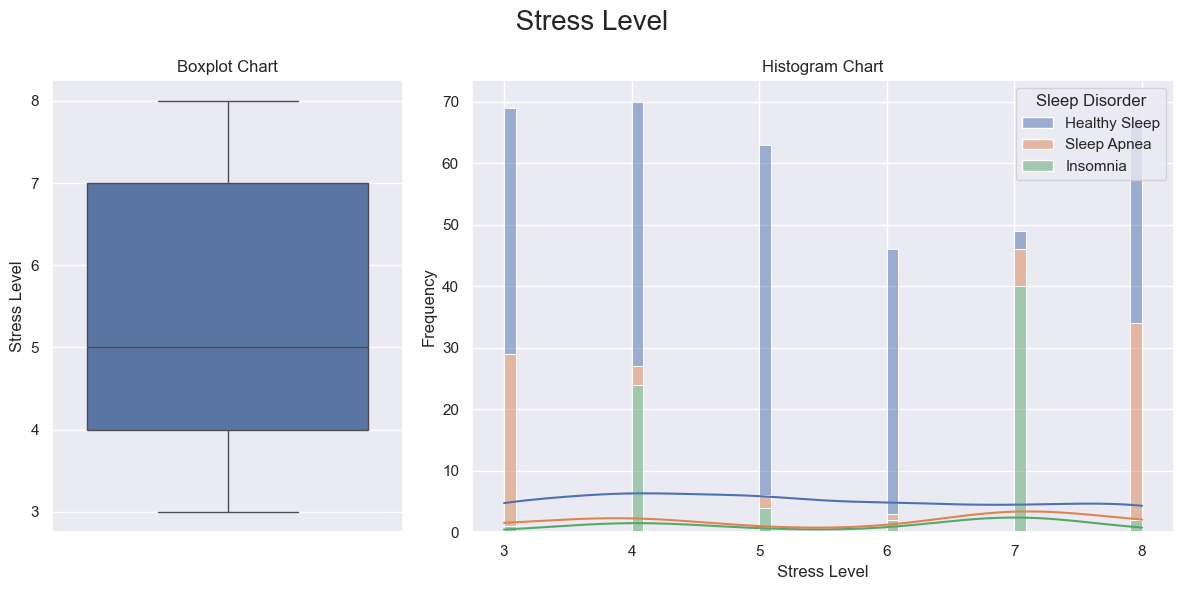

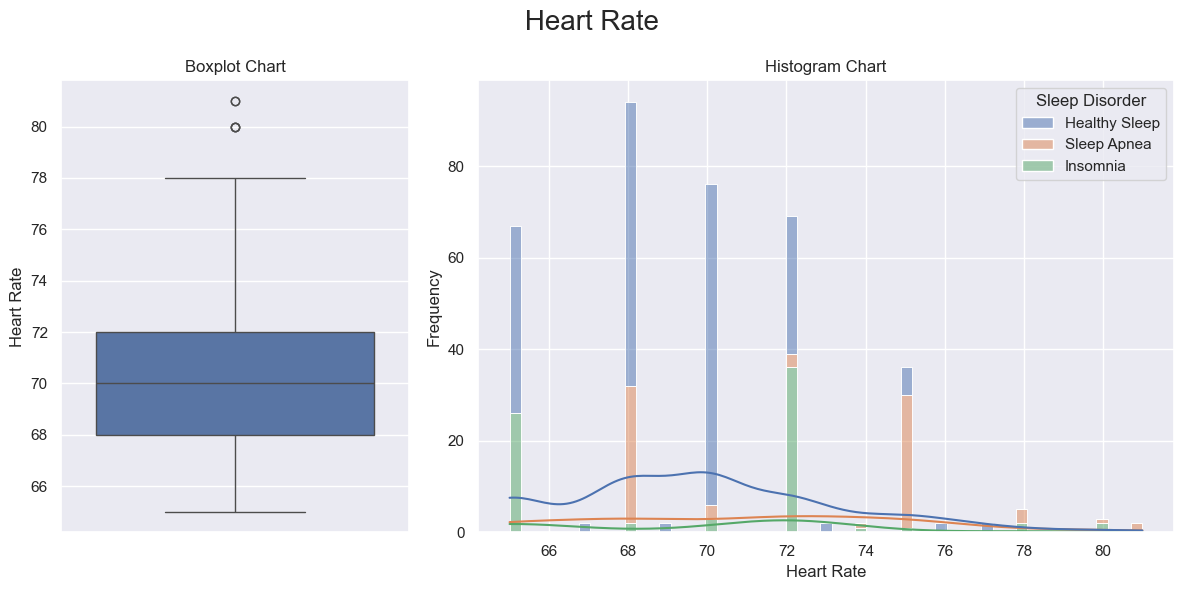

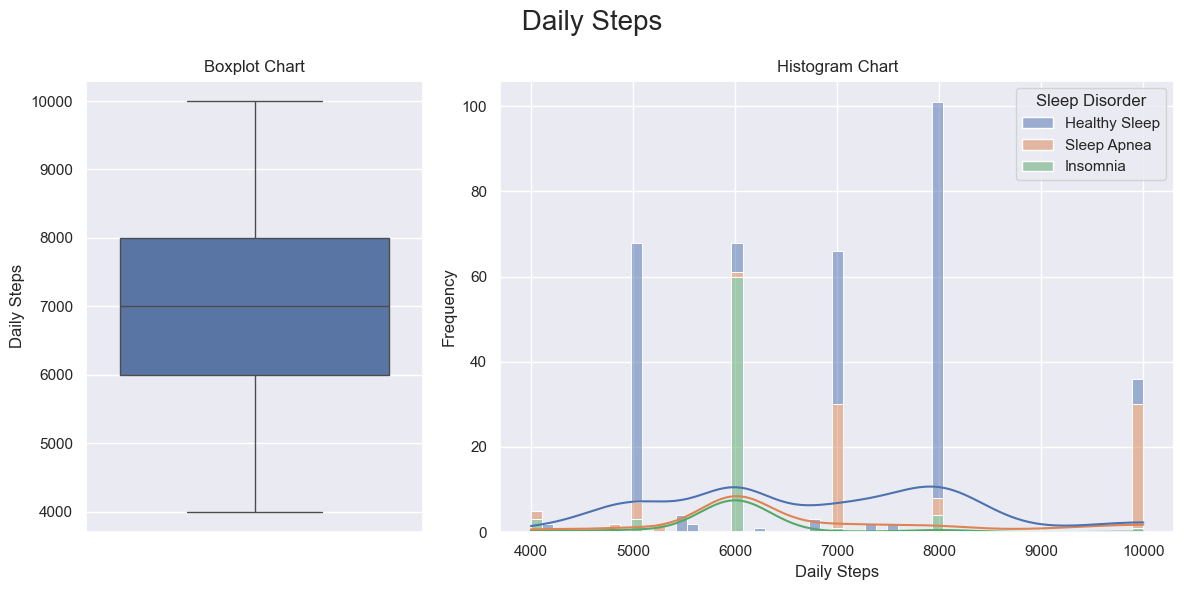

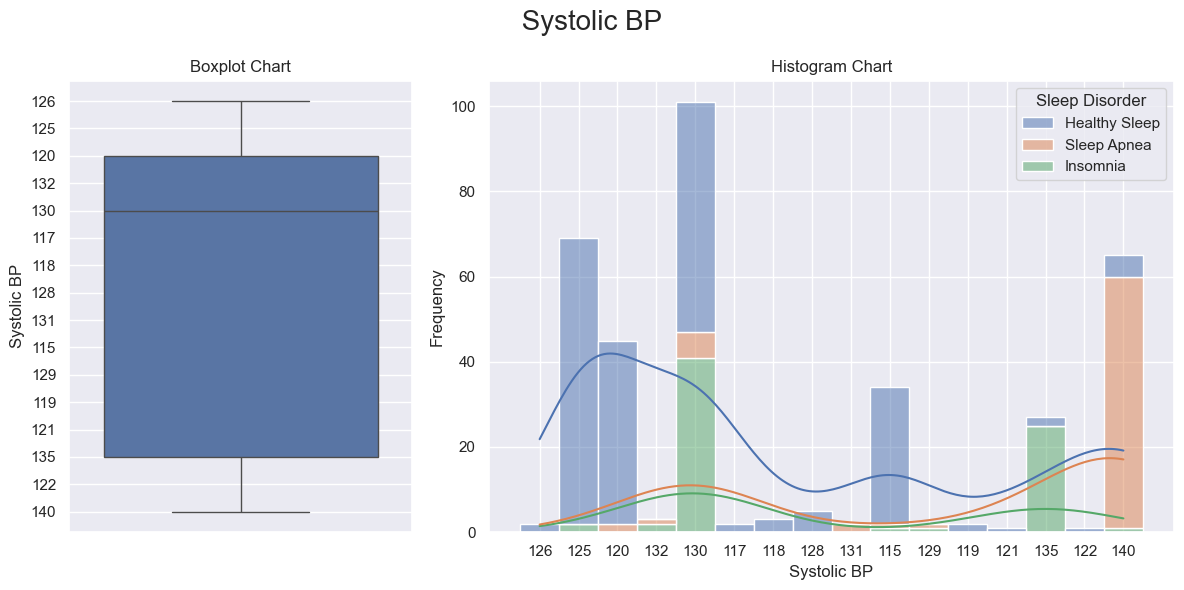

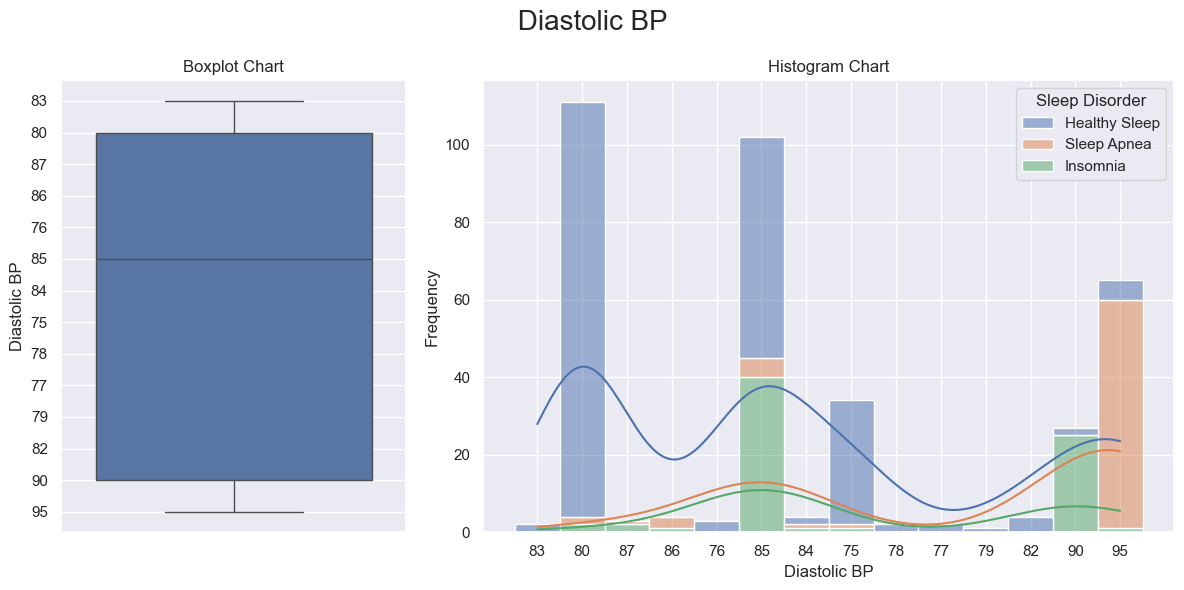

In [24]:
# Distribution of Categorical Features
def plot_continious_distribution(df, column, hue):

    width_ratios = [2, 4]
    gridspec_kw = {'width_ratios':width_ratios}
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw = gridspec_kw) 
    fig.suptitle(f' {column} ', fontsize=20) 
    
    sns.boxplot(df[column], ax=ax[0])
    ax[0].set_title('Boxplot Chart')
    ax[0].set_ylabel(column)

    sns.histplot(x = df[column], kde=True, ax=ax[1], hue=df[hue], multiple = 'stack', bins=55)
    ax[1].set_title('Histogram Chart')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()
for conti in continuous :
    plot_continious_distribution(df, conti, 'Sleep Disorder')    

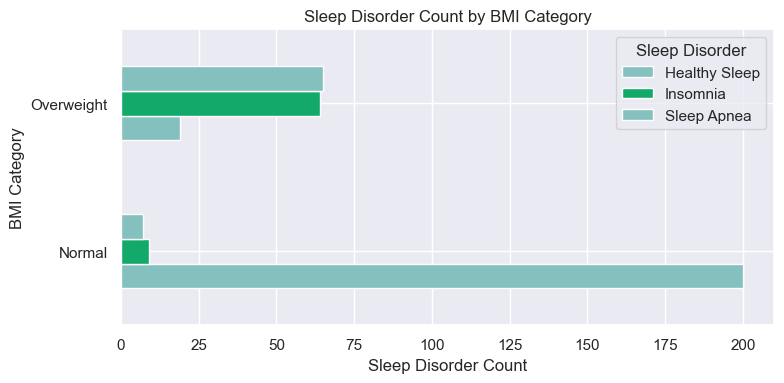

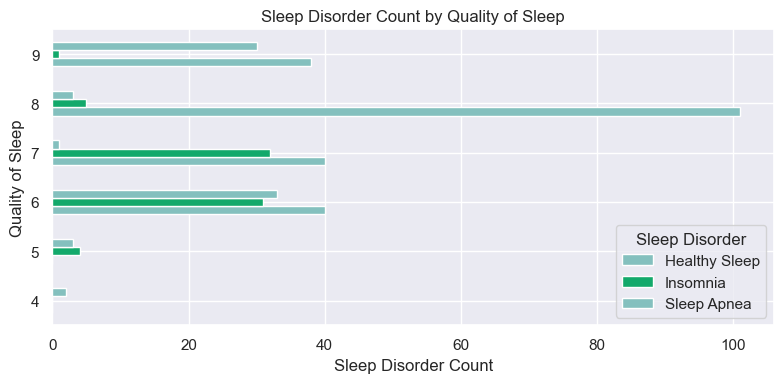

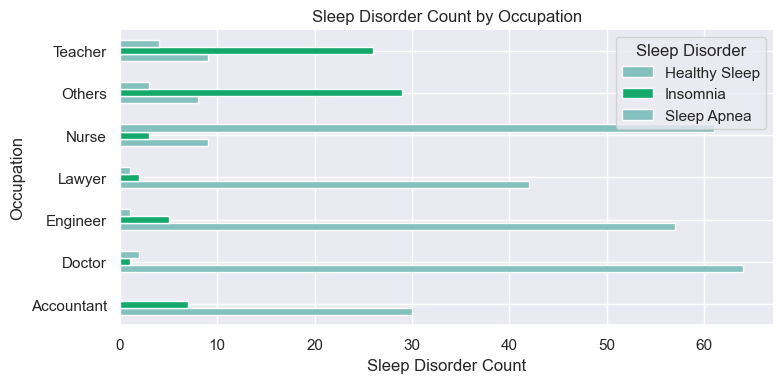

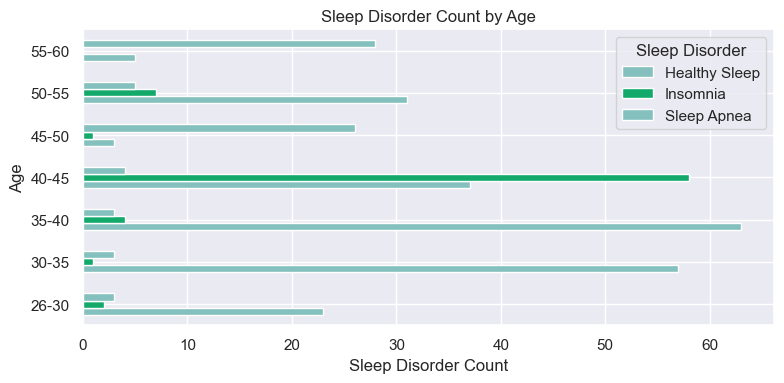

In [25]:
# Define a Function for Barh Plot
def bar_plot(x, y, df):
    barh = df.groupby([x, y]).size().unstack()
    barh.plot(kind='barh',  color = ['#84c0be', '#13a96b'], figsize=(8,4))
    plt.title(f'{y} Count by {x}')
    plt.xlabel(f'{y} Count')
    plt.ylabel(x)

    plt.tight_layout()
    plt.show()

bar_plot('BMI Category', 'Sleep Disorder', df)
bar_plot('Quality of Sleep', 'Sleep Disorder', df)
bar_plot('Occupation', 'Sleep Disorder', df)
bar_plot('Age', 'Sleep Disorder', df)

## Data Preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initialize StandardScaler
stc = StandardScaler()
# Initialize Label Encoder
le = LabelEncoder()

stc_cols = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'systolic_bp', 'diastolic_bp', 'Heart Rate', 'Daily Steps']
dum_cols= ['Age', 'Occupation', 'BMI Category']
le_cols = ['Gender', 'Sleep Disorder']

# Apply Standard Scaler to the selected columns
df[stc_cols] = stc.fit_transform(df[stc_cols])

# Apply Label Encoder to the selected columns
for col in le_cols :
    df[col] = le.fit_transform(df[col])

# Apply get_dummies to the selected columns
df = pd.get_dummies(df, columns=dum_cols)

## Training and Evaluating Different Models

In [10]:
from sklearn.model_selection import train_test_split 

x = df.drop(['Sleep Disorder', 'Person ID'], axis=1)
y = df['Sleep Disorder']  # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=12)

In [11]:
#Importing the Libraries
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [12]:
# List of Models to Try
models = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('XGB Classifier', XGBClassifier())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training accuracy: {name}', model.score(x_train, y_train))
    print(f'Test accuracy: {name}', accuracy_score(y_test, y_pred))
    print()

Training accuracy: Gradient Boosting 0.9255663430420712
Test accuracy: Gradient Boosting 0.9454545454545454

Training accuracy: K-Nearest Neighbors 0.9061488673139159
Test accuracy: K-Nearest Neighbors 0.9090909090909091

Training accuracy: Random Forest 0.9255663430420712
Test accuracy: Random Forest 0.9454545454545454

Training accuracy: Decision Tree 0.9255663430420712
Test accuracy: Decision Tree 0.9454545454545454

Training accuracy: XGB Classifier 0.9255663430420712
Test accuracy: XGB Classifier 0.9454545454545454



In [13]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

accuracy = accuracy_score(y_test, xgb_pred)
print(f'R-squared (XGB Classifier): {round(accuracy, 3)}')

R-squared (XGB Classifier): 0.945


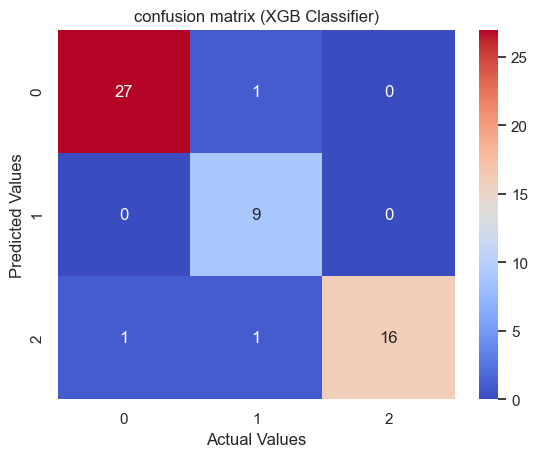

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test,xgb_pred),annot= True, cmap = 'coolwarm', fmt='.0f')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('confusion matrix (XGB Classifier)')
plt.show()

In [18]:
# Visualize Classification report for XGB Classifier
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.82      1.00      0.90         9
           2       1.00      0.89      0.94        18

    accuracy                           0.95        55
   macro avg       0.93      0.95      0.94        55
weighted avg       0.95      0.95      0.95        55



### Summary and Conclusion

In this project, I focused on predicting sleep disorders using a variety of data preprocessing and machine learning techniques. The steps and methodologies employed are as follows:

1. Data Cleaning and Preprocessing:
   - Handling Missing Values: Missing values were filled in a way that preserved the distribution of the data, maintaining the integrity of the dataset.
   
2. Categorical Encoding and Feature Engineering:
   - Age Categorization: The age of individuals was converted into categorical variables to enhance model performance.
   - Occupation Simplification: The occupation feature, which had many unique values, was simplified to reduce complexity.
   - Blood Pressure Columns: The single blood pressure column was split into two separate columns for more detailed analysis.
   - BMI Categorization: The BMI index was converted from three categories into two for better model accuracy.

3. Data Visualization:
   - Appropriate visualizations were created to explore and understand the data patterns and relationships.

4. Data Standardization and Labeling:
   - Data standardization was performed to normalize the features, and label encoding was applied to convert categorical variables into numerical format.

5. Model Training and Evaluation:
   - An XGBoost (XGB) model was trained on the processed dataset, achieving an accuracy of 94.5%.

These steps ensured a comprehensive analysis and model training process, leading to a highly accurate prediction model for sleep disorders.

### *Developed by Hosein Mohammadi*
GitHub : https://github.com/Hosein541

Kaggle : https://www.kaggle.com/hoseinnnnnnn 

Gmail : Huseinmohammadi83@gmail.com